# Housing Price Analysis - Dataset de Kaggle
# Dataset: https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset/data


In [4]:
# Conectar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importar librerías
import pandas as pd
from IPython.display import display

# Ruta del archivo en Google Drive
housing_path = "/content/drive/MyDrive/Data Science II/Housing.csv"

# Leer el dataset
df_housing = pd.read_csv(housing_path)

# Configuraciones para mostrar el DataFrame completo
pd.set_option('display.max_rows', 20)         # Número máximo de filas
pd.set_option('display.max_columns', None)    # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False) # Evitar saltos de línea en la tabla

# Mostrar el DataFrame
display(df_housing)

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0      7229300521  20141013T000000  231300.0         2       1.00         1180      5650     1.0           0     0          3      7        1180              0      1955             0    98178  47.5112 -122.257           1340        5650
1      6414100192  20141209T000000  538000.0         3       2.25         2570      7242     2.0           0     0          3      7        2170            400      1951          1991    98125  47.7210 -122.319           1690        7639
2      5631500400  20150225T000000  180000.0         2       1.00          770     10000     1.0           0     0          3      6         770              0      1933             0    98028  47.7379 -122.233           2720        8062
3      2487200875  20141209T000000  604000.0         4       3.00         1960      5000     1.0           0     0          5      7        1050            910      1965             0    98136  47.5208 -122.393           1360        5000
4      1954400510  20150218T000000  510000.0         3       2.00         1680      8080     1.0           0     0          3      8        1680              0      1987             0    98074  47.6168 -122.045           1800        7503
...           ...              ...       ...       ...        ...          ...       ...     ...         ...   ...        ...    ...         ...            ...       ...           ...      ...      ...      ...            ...         ...
21608   263000018  20140521T000000  360000.0         3       2.50         1530      1131     3.0           0     0          3      8        1530              0      2009             0    98103  47.6993 -122.346           1530        1509
21609  6600060120  20150223T000000  400000.0         4       2.50         2310      5813     2.0           0     0          3      8        2310              0      2014             0    98146  47.5107 -122.362           1830        7200
21610  1523300141  20140623T000000  402101.0         2       0.75         1020      1350     2.0           0     0          3      7        1020              0      2009             0    98144  47.5944 -122.299           1020        2007
21611   291310100  20150116T000000  400000.0         3       2.50         1600      2388     2.0           0     0          3      8        1600              0      2004             0    98027  47.5345 -122.069           1410        1287
21612  1523300157  20141015T000000  325000.0         2       0.75         1020      1076     2.0           0     0          3      7        1020              0      2008             0    98144  47.5941 -122.299           1020        1357

[21613 rows x 21 columns]

## Descripcion de las Variables

1. **id**: Identificador único de la propiedad. No es relevante para el análisis predictivo.

2. **date**: Fecha de la venta. Podría ser útil si se quiere analizar tendencias temporales, pero no es esencial para predecir el precio.

3. **price**: Precio de la vivienda. Esta es tu variable objetivo (target).

4. **bedrooms**: Número de habitaciones.

5. **bathrooms**: Número de baños.

6. **sqft_living**: Metros cuadrados de espacio habitable.

7. **sqft_lot**: Metros cuadrados del terreno.

8. **floors**: Número de pisos.

9. **waterfront**: Indica si la propiedad tiene vista al agua (1) o no (0). Es una variable categórica binaria.

10. **view**: Calificación de la vista (escala numérica).

11. **condition**: Condición general de la propiedad (escala numérica).

12. **grade**: Calificación de la construcción (escala numérica).

13. **sqft_above**: Metros cuadrados sobre el nivel del suelo.

14. **sqft_basement**: Metros cuadrados del sótano.

15. **yr_built**: Año de construcción.

16. **yr_renovated**: Año de renovación (si se renovó).

17. **zipcode**: Código postal. Podría ser útil para análisis geográficos.

18. **lat**: Latitud.

19. **long**: Longitud.

20. **sqft_living15**: Metros cuadrados de espacio habitable promedio de los 15 vecinos más cercanos.

21. **sqft_lot15**: Metros cuadrados del terreno promedio de los 15 vecinos más cercanos.

## Variables Relevantes (Justificación):

1. **Características físicas**: El tamaño de la propiedad (**sqft_living**, **sqft_lot**), el número de habitaciones (**bedrooms**), baños (**bathrooms**), y la calidad de la construcción (**grade**, **condition**) influyen directamente en el precio.

2. **Ubicación**: La latitud (**lat**), longitud (**long**), y el código postal (**zipcode**) pueden capturar el valor de la ubicación.

3. **Características adicionales**: Tener vista al agua (**waterfront**) o una buena vista (**view**) suele aumentar el valor de una propiedad.

4. **Contexto vecinal**: Las variables **sqft_living15** y **sqft_lot15** dan una idea del entorno de la propiedad.

In [6]:
# 1. Información general del dataset
print("Dimensiones del dataset:", df_housing.shape)
print("\nInformación del dataset:")
print(df_housing.info())

# 2. Resumen estadístico
print("\nResumen estadístico:")
print(df_housing.describe())

# 3. Verificar valores nulos
print("\nCantidad de valores nulos por columna:")
print(df_housing.isnull().sum())

# 4. Verificar duplicados
print("\nCantidad de filas duplicadas:", df_housing.duplicated().sum())

# 5. Mostrar las primeras 5 filas
print("\nPrimeras 5 filas del dataset:")
display(df_housing.head())

Dimensiones del dataset: (21613, 21)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  7229300521  20141013T000000  231300.0         2       1.00         1180      5650     1.0           0     0          3      7        1180              0      1955             0    98178  47.5112 -122.257           1340        5650
1  6414100192  20141209T000000  538000.0         3       2.25         2570      7242     2.0           0     0          3      7        2170            400      1951          1991    98125  47.7210 -122.319           1690        7639
2  5631500400  20150225T000000  180000.0         2       1.00          770     10000     1.0           0     0          3      6         770              0      1933             0    98028  47.7379 -122.233           2720        8062
3  2487200875  20141209T000000  604000.0         4       3.00         1960      5000     1.0           0     0          5      7        1050            910      1965             0    98136  47.5208 -122.393           1360        5000
4  1954400510  20150218T000000  510000.0         3       2.00         1680      8080     1.0           0     0          3      8        1680              0      1987             0    98074  47.6168 -122.045           1800        7503

## Dimensiones del dataset
El dataset tiene **21,613 filas** (observaciones) y **21 columnas** (variables). Esto indica que se tiene un volumen considerable de datos para trabajar.

## Información del dataset
* Todas las columnas tienen **21,613 valores no nulos**, lo que sugiere que no hay valores faltantes en el dataset, lo que simplifica la limpieza de datos.
* Los tipos de datos son:
 * **int64**: 15 columnas (variables enteras, como bedrooms, sqft_living, etc.).
 * **float64**: 5 columnas (variables decimales, como price, bathrooms, etc.).
 * **object**: 1 columna (date, que es una cadena de texto). Si se decide usarla, se debera convertir a un formato de fecha.

## Resumen estadístico
Se muestran estadísticas descriptivas para cada columna numérica.
* **Precio (price):**
El precio promedio de las viviendas es 540088 con un rango que va desde **$75.000** hasta **$7.700.000**.
* **Habitaciones (bedrooms):**
El número promedio de habitaciones es **3.37**, con un máximo de **33 habitaciones**. Este valor máximo parece ser un outlier (posible error).
* **Baños (bathrooms):**
El número promedio de baños es **2.11**, con un máximo de **8 baños**.
* **Metros cuadrados (sqft_living, sqft_lot):**
El tamaño promedio de la vivienda es **2,079.9 sqft**, y el tamaño promedio del terreno es **15,106.97 sqft**.
Hay una gran variabilidad en el tamaño del terreno (**sqft_lot**), con un máximo de **1,651,359 sqft**.
* **Año de construcción (yr_built):**
Las viviendas fueron construidas entre **1900** y **2015**, con un promedio en **1971**.
* **Año de renovación (yr_renovated):**
El 75% de las viviendas no han sido renovadas (**yr_renovated = 0**), lo que sugiere que esta columna tiene muchos ceros.
* **Ubicación (lat, long):**
Las coordenadas geográficas están dentro de un rango razonable para la zona de Seattle (latitud ~47.56, longitud ~-122.21).

## Valores Nulos
No hay valores nulos en ninguna columna. No es necesario realizar imputaciones o eliminar filas por valores faltantes.

## Filas duplicadas
No hay filas duplicadas. No es necesario eliminar duplicados.

## Primeras 5 filas
Se muestran las primeras 5 filas del dataset. Esto permite verificar que los datos se han cargado correctamente y tener una idea de cómo están estructurados.


Tipos de datos:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
                  ...   
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Length: 21, dtype: object

Valores únicos en columnas categóricas:

date: ['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' '20140613T000000' '20141230T000000'
 '20150213T000000' '20140620T000000' '20140715T000

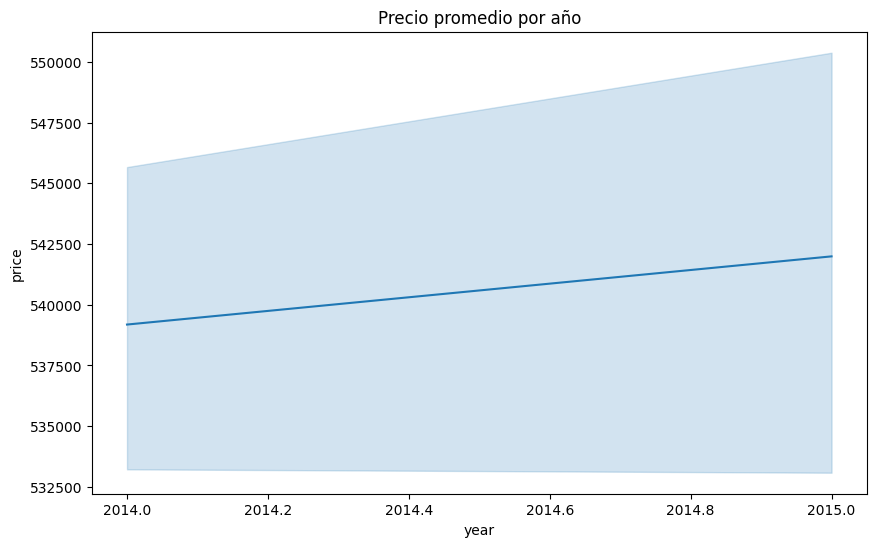

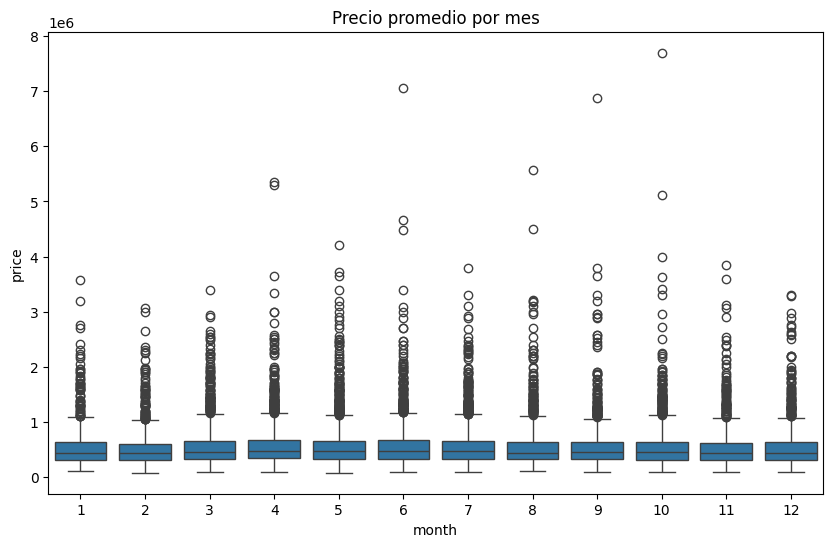

In [7]:
# 6. Verificar tipos de datos
print("\nTipos de datos:")
print(df_housing.dtypes)

# 7. Convertir tipos de datos según sea necesario
# Por ejemplo, convertir columnas de fecha si existen
# (Ajustar según los resultados de la exploración)

# Para variables categóricas, podemos verificar sus valores únicos
categorical_cols = df_housing.select_dtypes(include=['object']).columns
print("\nValores únicos en columnas categóricas:")
for col in categorical_cols:
    print(f"\n{col}: {df_housing[col].unique()}")
    print(f"Cantidad de valores únicos: {df_housing[col].nunique()}")

# Convertir la columna 'date' a formato de fecha
df_housing['date'] = pd.to_datetime(df_housing['date'])

# Extraer año, mes y día de la semana
df_housing['year'] = df_housing['date'].dt.year
df_housing['month'] = df_housing['date'].dt.month
df_housing['day_of_week'] = df_housing['date'].dt.dayofweek  # 0 = Lunes, 6 = Domingo

# Verificar si la fecha influye en el precio
import matplotlib.pyplot as plt
import seaborn as sns

# Precio promedio por año
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=df_housing, estimator='mean')
plt.title('Precio promedio por año')
plt.show()

# Precio promedio por mes
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data=df_housing)
plt.title('Precio promedio por mes')
plt.show()

## Tipos de datos actualizados
La columna **date** ahora está en formato de fecha (**datetime64[ns]**), lo que permite trabajar con la misma de manera más eficiente.
Se han añadido tres nuevas columnas: **year**, **month** y **day_of_week**, que son de tipo entero (**int32**). Estas columnas permiten analizar tendencias temporales.

## Gráfico: Precio promedio por año
El gráfico muestra que el precio promedio de las viviendas ha aumentado ligeramente entre **2014** y **2015**. Esto sugiere que podría haber una tendencia creciente en los precios de las viviendas durante este período. Sin embargo, dado que solo se tiene datos de dos años (2014 y 2015), la tendencia no es muy robusta. Sería útil contar con más datos para confirmar esta tendencia.

## Gráfico: Precio promedio por mes


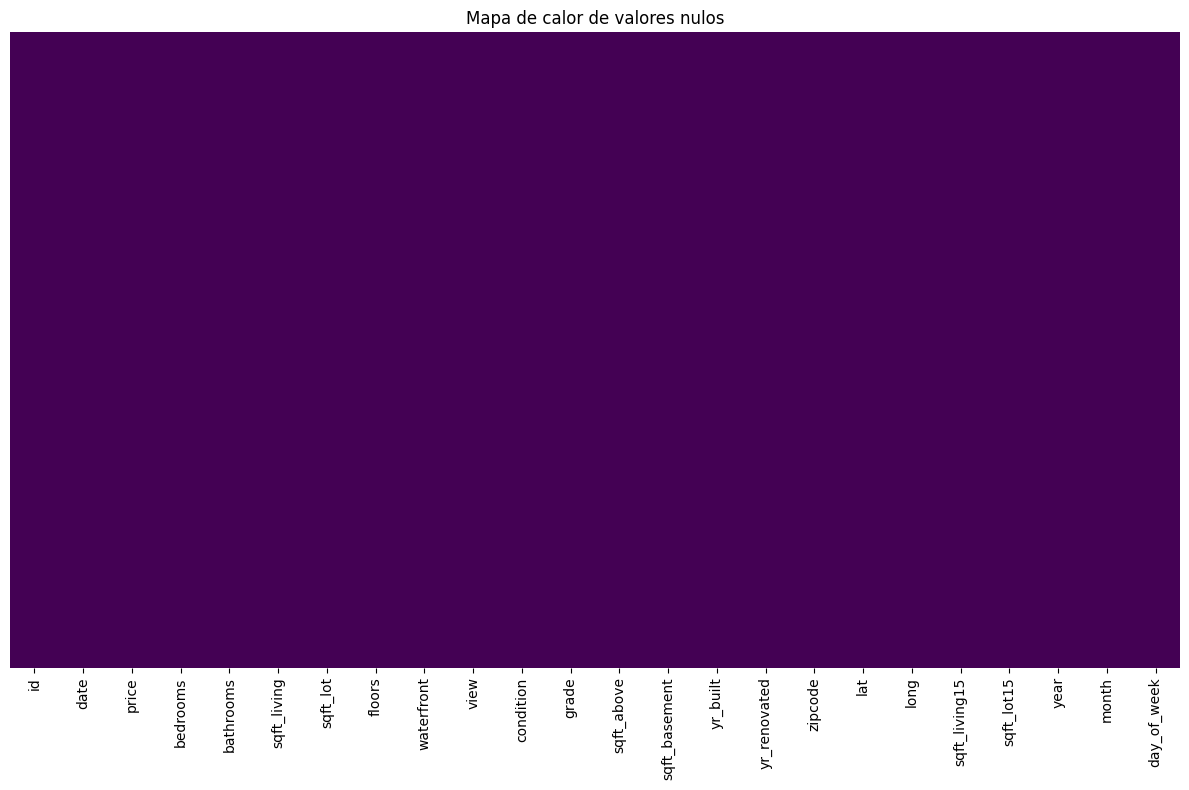

Columna id: 0.00% de valores nulos
Columna date: 0.00% de valores nulos
Columna price: 0.00% de valores nulos
Columna bedrooms: 0.00% de valores nulos
Columna bathrooms: 0.00% de valores nulos
Columna sqft_living: 0.00% de valores nulos
Columna sqft_lot: 0.00% de valores nulos
Columna floors: 0.00% de valores nulos
Columna waterfront: 0.00% de valores nulos
Columna view: 0.00% de valores nulos
Columna condition: 0.00% de valores nulos
Columna grade: 0.00% de valores nulos
Columna sqft_above: 0.00% de valores nulos
Columna sqft_basement: 0.00% de valores nulos
Columna yr_built: 0.00% de valores nulos
Columna yr_renovated: 0.00% de valores nulos
Columna zipcode: 0.00% de valores nulos
Columna lat: 0.00% de valores nulos
Columna long: 0.00% de valores nulos
Columna sqft_living15: 0.00% de valores nulos
Columna sqft_lot15: 0.00% de valores nulos
Columna year: 0.00% de valores nulos
Columna month: 0.00% de valores nulos
Columna day_of_week: 0.00% de valores nulos


In [8]:
# 8. Análisis y tratamiento de valores nulos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualización de valores nulos
plt.figure(figsize=(12, 8))
sns.heatmap(df_housing.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.tight_layout()
plt.show()

# Función para tratar valores nulos según el tipo de columna
def handle_missing_values(df):
    df_clean = df.copy()

    for column in df.columns:
        # Porcentaje de valores nulos
        null_percentage = df[column].isnull().mean() * 100
        print(f"Columna {column}: {null_percentage:.2f}% de valores nulos")

        # Si tiene más del 30% de valores nulos, considerar eliminar la columna
        if null_percentage > 30:
            print(f"  - Recomendación: Eliminar columna {column} (>30% valores nulos)")
            # df_clean = df_clean.drop(columns=[column])

        # Si es numérica, llenar con la mediana (más robusta que la media para outliers)
        elif df[column].dtype in ['int64', 'float64'] and null_percentage > 0:
            median_value = df[column].median()
            print(f"  - Recomendación: Llenar con mediana ({median_value})")
            df_clean[column] = df_clean[column].fillna(median_value)

        # Si es categórica, llenar con el valor más frecuente
        elif df[column].dtype == 'object' and null_percentage > 0:
            mode_value = df[column].mode()[0]
            print(f"  - Recomendación: Llenar con moda ({mode_value})")
            df_clean[column] = df_clean[column].fillna(mode_value)

    return df_clean

# Aplicar la función para tratar nulos
df_clean = handle_missing_values(df_housing)

## Mapa de calor de valores nulos

El mapa de calor no muestra ninguna celda coloreada, lo que indica que **no hay valores nulos** en ninguna columna del dataset. No hay preocupacion por imputar o eliminar valores faltantes.

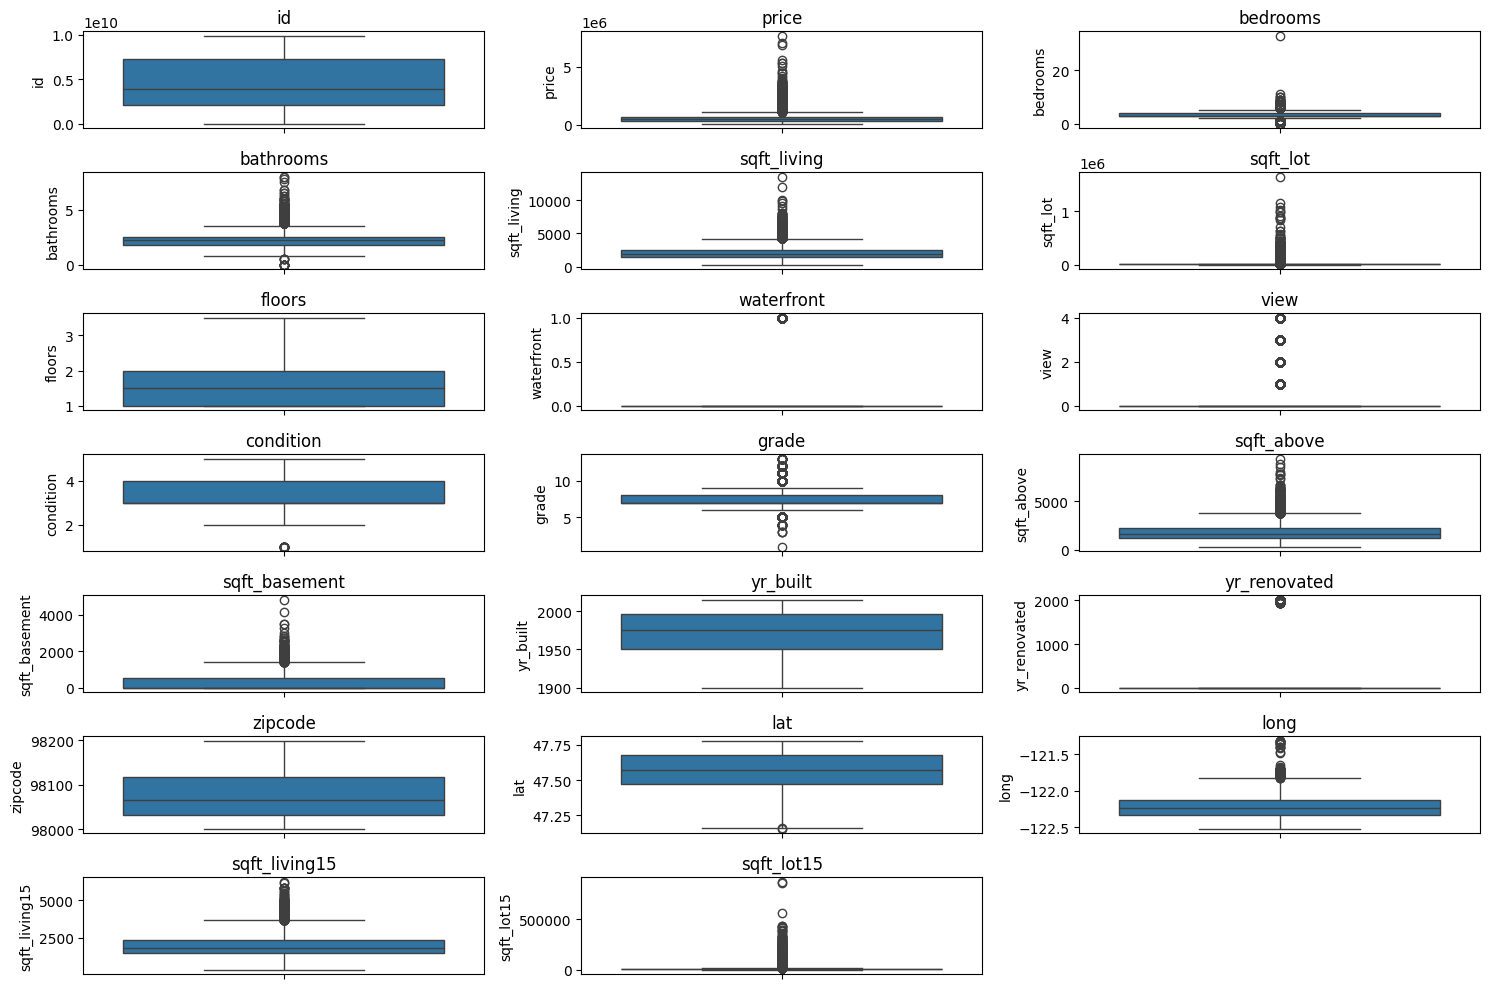

Columna id: 0 outliers (0.00%)
  - Límite inferior: -5655727682.50
  - Límite superior: 15087677321.50
Columna price: 1146 outliers (5.30%)
  - Límite inferior: -162625.00
  - Límite superior: 1129575.00
  - Recomendación: Aplicar capping a los outliers
Columna bedrooms: 546 outliers (2.53%)
  - Límite inferior: 1.50
  - Límite superior: 5.50
  - Recomendación: Aplicar capping a los outliers
Columna bathrooms: 571 outliers (2.64%)
  - Límite inferior: 0.62
  - Límite superior: 3.62
  - Recomendación: Aplicar capping a los outliers
Columna sqft_living: 572 outliers (2.65%)
  - Límite inferior: -257.50
  - Límite superior: 4234.50
  - Recomendación: Aplicar capping a los outliers
Columna sqft_lot: 2425 outliers (11.22%)
  - Límite inferior: -3432.00
  - Límite superior: 19160.00
  - Recomendación: Aplicar capping a los outliers
Columna floors: 0 outliers (0.00%)
  - Límite inferior: -0.50
  - Límite superior: 3.50
Columna waterfront: 163 outliers (0.75%)
  - Límite inferior: 0.00
  - Lím

In [9]:
# 9. Identificación y tratamiento de outliers
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Visualizar la distribución de las variables numéricas para detectar outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df_clean[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Función para detectar outliers mediante el método IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Función para tratar outliers
def handle_outliers(df, method='cap'):
    df_no_outliers = df.copy()

    for column in numeric_cols:
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
        outlier_percentage = (len(outliers) / len(df)) * 100

        print(f"Columna {column}: {len(outliers)} outliers ({outlier_percentage:.2f}%)")
        print(f"  - Límite inferior: {lower_bound:.2f}")
        print(f"  - Límite superior: {upper_bound:.2f}")

        if outlier_percentage > 0:
            if method == 'cap':
                # Método de capping: limitar los valores extremos
                print(f"  - Recomendación: Aplicar capping a los outliers")
                df_no_outliers[column] = df_no_outliers[column].clip(lower=lower_bound, upper=upper_bound)
            elif method == 'remove':
                # Método de eliminación: quitar filas con outliers
                print(f"  - Recomendación: Eliminar filas con outliers")
                df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) &
                                               (df_no_outliers[column] <= upper_bound)]

    return df_no_outliers

# Aplicar la función para tratar outliers (usando el método de capping por defecto)
df_final = handle_outliers(df_clean, method='cap')

## Identificación de outliers
Se identificado outliers en varias columnas utilizando el método del rango intercuartílico (IQR).

Algunas columnas tienen un porcentaje significativo de outliers, como:
* price: 5.30% de outliers.
* sqft_lot: 11.22% de outliers.
* view: 9.83% de outliers.
* grade: 8.84% de outliers.
* sqft_lot15: 10.15% de outliers.

Otras columnas tienen un porcentaje menor de outliers, como lat (0.01%) y long (1.18%).

Algunas columnas no tienen outliers, como id, floors, yr_built, y zipcode.

## Tratamiento de outliers
Se aplico el método de **capping** para tratar los outliers, limitando los valores extremos a los límites inferior y superior calculados con el IQR.
El método de capping es una buena opción cuando no quieres eliminar filas del dataset, pero se desea reducir el impacto de los valores extremos en tu análisis o modelo.
Al aplicar capping, los valores que estaban por debajo del límite inferior se ajustan al límite inferior, y los valores que estaban por encima del límite superior se ajustan al límite superior.

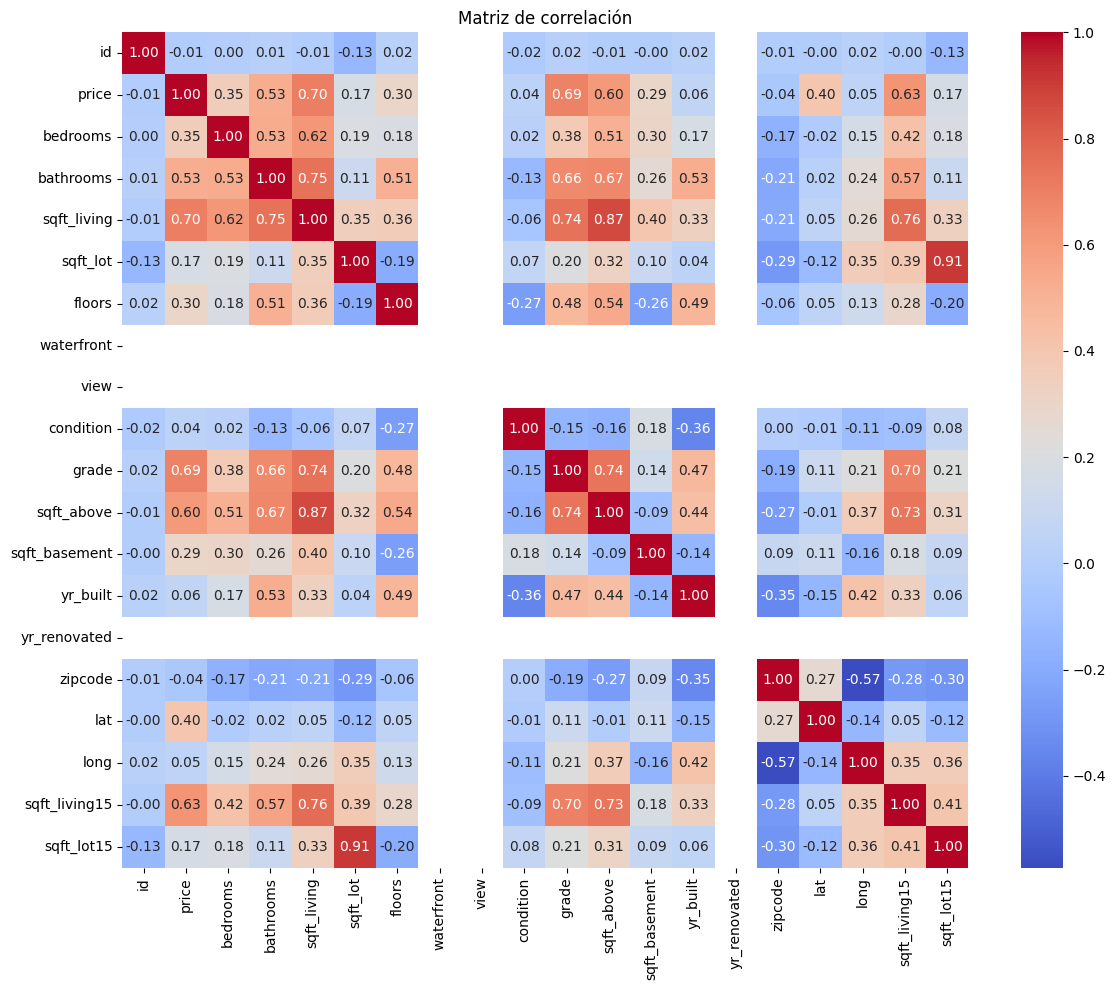


Cantidad de filas duplicadas después de la limpieza: 0

Resumen del proceso de limpieza:
Filas originales: 21613
Filas después de la limpieza: 21613
Columnas originales: 24
Columnas después de la limpieza: 24

Dataset limpio guardado como 'housing_clean.csv'


In [10]:
# 10. Correlación entre variables numéricas
plt.figure(figsize=(12, 10))
correlation_matrix = df_final.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

# 11. Verificar duplicados después de la limpieza
duplicates = df_final.duplicated().sum()
print(f"\nCantidad de filas duplicadas después de la limpieza: {duplicates}")

if duplicates > 0:
    print("Recomendación: Eliminar filas duplicadas")
    df_final = df_final.drop_duplicates()

# 12. Mostrar resumen del proceso de limpieza
print("\nResumen del proceso de limpieza:")
print(f"Filas originales: {df_housing.shape[0]}")
print(f"Filas después de la limpieza: {df_final.shape[0]}")
print(f"Columnas originales: {df_housing.shape[1]}")
print(f"Columnas después de la limpieza: {df_final.shape[1]}")

# 13. Guardar el dataset limpio
df_final.to_csv('/content/drive/MyDrive/Data Science II/housing_clean.csv', index=False)
print("\nDataset limpio guardado como 'housing_clean.csv'")

## Matriz de correlación
La matriz de correlación permite identificar qué variables están más relacionadas con el precio (**price**), lo cual es útil para seleccionar características relevantes para el modelo.

Algunas correlaciones destacadas:

* **sqft_living**: Tiene una correlación alta con **price** (0.70), lo que indica que el tamaño de la vivienda es un factor importante en el precio.

* **grade**: También tiene una correlación alta con **price** (0.69), lo que sugiere que la calidad de la construcción influye en el precio.

* **bathrooms**: Tiene una correlación moderada con **price** (0.53).

* **sqft_living15**: Tiene una correlación alta con **price** (0.63), lo que indica que el tamaño de las viviendas vecinas también es relevante.

Variables como **id**, **zipcode**, y **yr_built** tienen correlaciones bajas o negativas con **price**, lo que sugiere que son menos relevantes para predecir el precio.

# **Data Storytelling: Análisis de precios de viviendas**

## **Preguntas de alto nivel**



### **¿Cuáles son las características más influyentes en el precio de las viviendas?**
Hipótesis: El tamaño de la vivienda (**sqft_living**) y la calidad de la construcción (**grade**) son los factores más importantes.

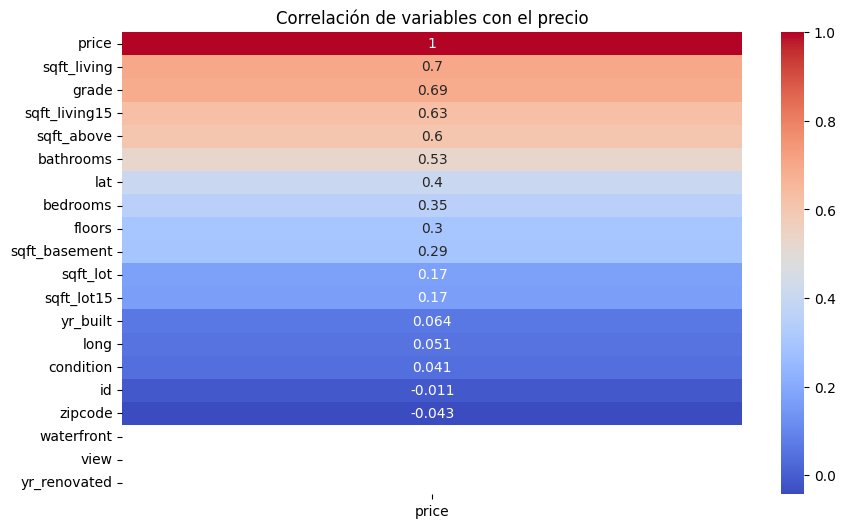

In [11]:
# Usar la matriz de correlación para identificar las variables más relacionadas con el precio.
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación de variables con el precio')
plt.show()

### **Insights clave**
1. **El tamaño de la vivienda (sqft_living) es el factor más importante para determinar el precio.** Las viviendas más grandes tienden a ser significativamente más caras.

2. **La calidad de la construcción (grade) es el segundo factor más influyente.** Las viviendas con una calificación más alta tienen precios más altos.

3. **El entorno de la vivienda (sqft_living15) también es importante.** Las viviendas en áreas con propiedades más grandes tienden a ser más valiosas.

4. **El número de baños (bathrooms) y la ubicación (lat) tienen una influencia moderada** en el precio, pero no son tan determinantes como el tamaño o la calidad.

5. **El tamaño del terreno (sqft_lot) y el año de construcción (yr_built) tienen poca influencia** en el precio, lo que sugiere que los compradores valoran más el tamaño y la calidad de la vivienda que el terreno o la antigüedad.

#### **Visualización mejorada**
Para comunicar estos insights de manera más efectiva, se puede crear un gráfico de barras que muestre las correlaciones de las variables más importantes con el precio:

<ipython-input-12-97df6294c3da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relevant_vars.index, y=relevant_vars.values, palette='viridis')


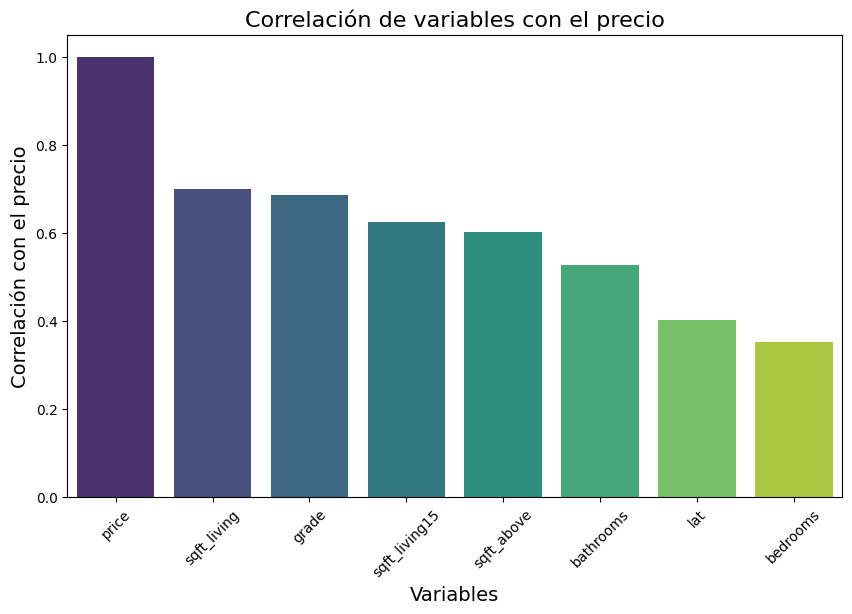

In [12]:
# Crear un DataFrame con las correlaciones
corr_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Filtrar las variables más relevantes (correlación > 0.3)
relevant_vars = corr_with_price[abs(corr_with_price) > 0.3]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=relevant_vars.index, y=relevant_vars.values, palette='viridis')
plt.title('Correlación de variables con el precio', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Correlación con el precio', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### **¿Cómo ha evolucionado el precio de las viviendas a lo largo del tiempo?**
Hipótesis: Los precios han aumentado ligeramente entre 2014 y 2015.



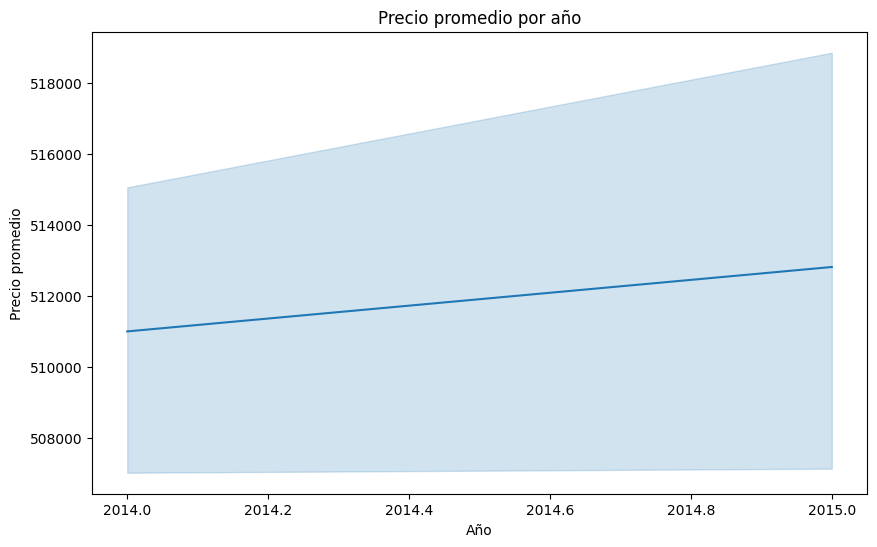

In [13]:
# Agrupar los datos por año y calcular el precio promedio.
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=df_final, estimator='mean')
plt.title('Precio promedio por año')
plt.xlabel('Año')
plt.ylabel('Precio promedio')
plt.show()

### **Insights clave**
1. **Tendencia alcista**: Los precios de las viviendas han aumentado de manera constante entre 2014 y 2015. Esto podría indicar un mercado inmobiliario en crecimiento durante ese período.

2. **Crecimiento moderado**: El aumento no es abrupto, sino gradual, lo que sugiere un mercado estable sin fluctuaciones extremas.

3. **No hay estacionalidad evidente**: A diferencia de algunos mercados inmobiliarios, no se observan patrones estacionales claros (por ejemplo, precios más altos en ciertos meses).


#### **Visualización mejorada**
Para comunicar estos insights de manera más efectiva, se puede mejorar la visualización añadiendo una línea de tendencia y anotaciones:

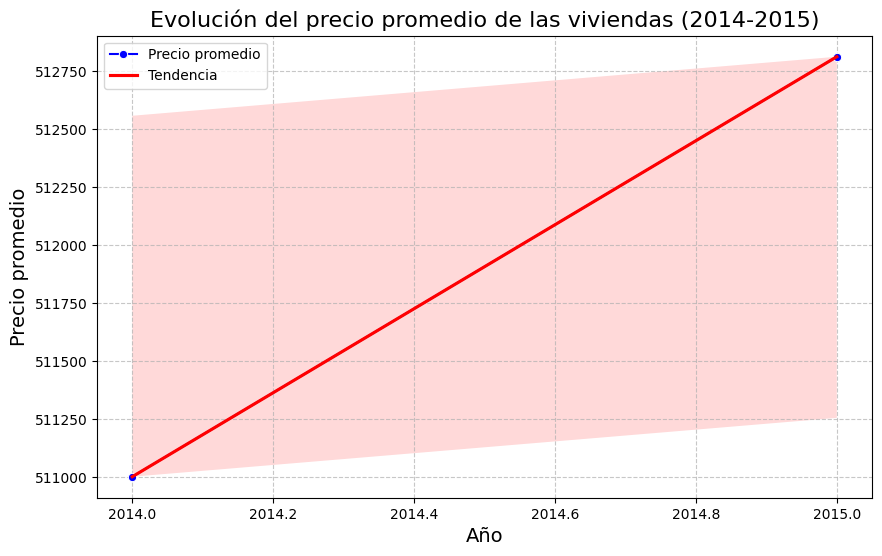

In [14]:
# Calcular el precio promedio por año
price_by_year = df_final.groupby('year')['price'].mean().reset_index()

# Gráfico de línea con línea de tendencia
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=price_by_year, marker='o', color='b', label='Precio promedio')
sns.regplot(x='year', y='price', data=price_by_year, scatter=False, color='r', label='Tendencia')
plt.title('Evolución del precio promedio de las viviendas (2014-2015)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Precio promedio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### **¿Existe una relación entre la ubicación geográfica y el precio de las viviendas?**
Hipótesis: Las viviendas en ciertas áreas (por ejemplo, cerca del agua o en códigos postales específicos) tienen precios más altos.

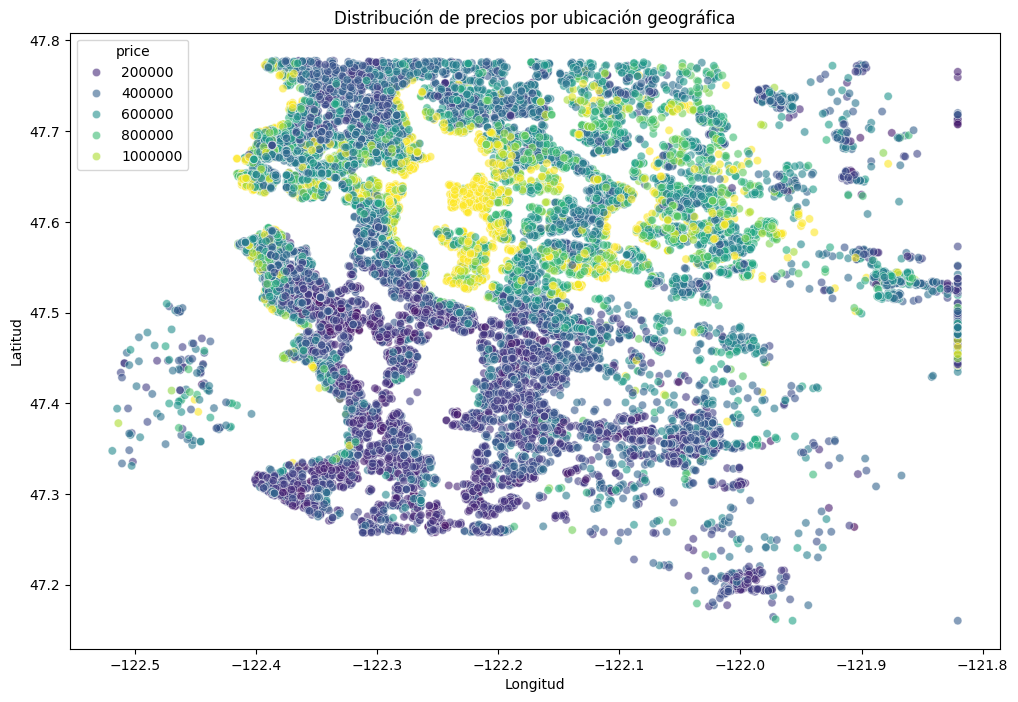

In [ ]:
# Visualizar la distribución de precios en un mapa usando lat y long.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', hue='price', data=df_final, palette='viridis', alpha=0.6)
plt.title('Distribución de precios por ubicación geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

### **Insights clave**
1. **La ubicación geográfica influye significativamente en el precio**: Las viviendas en ciertas áreas (por ejemplo, latitud ~47.6 a 47.7 y longitud ~-122.2 a -122.3) tienen precios más altos, lo que sugiere que estas zonas son más deseables.

2. **Clústeres de alto valor**: Existen áreas específicas donde las viviendas tienden a ser más caras, lo que podría deberse a factores como la proximidad al centro de la ciudad, vistas al agua, o acceso a servicios.

3. **Variabilidad local**: Incluso dentro de áreas cercanas, hay diferencias significativas en los precios, lo que indica que factores locales (como la calidad de la construcción o el tamaño de la vivienda) también juegan un papel importante.


#### **Visualización mejorada**
Para comunicar estos insights de manera más efectiva, se puede mejorar la visualización añadiendo anotaciones y resaltando áreas clave:

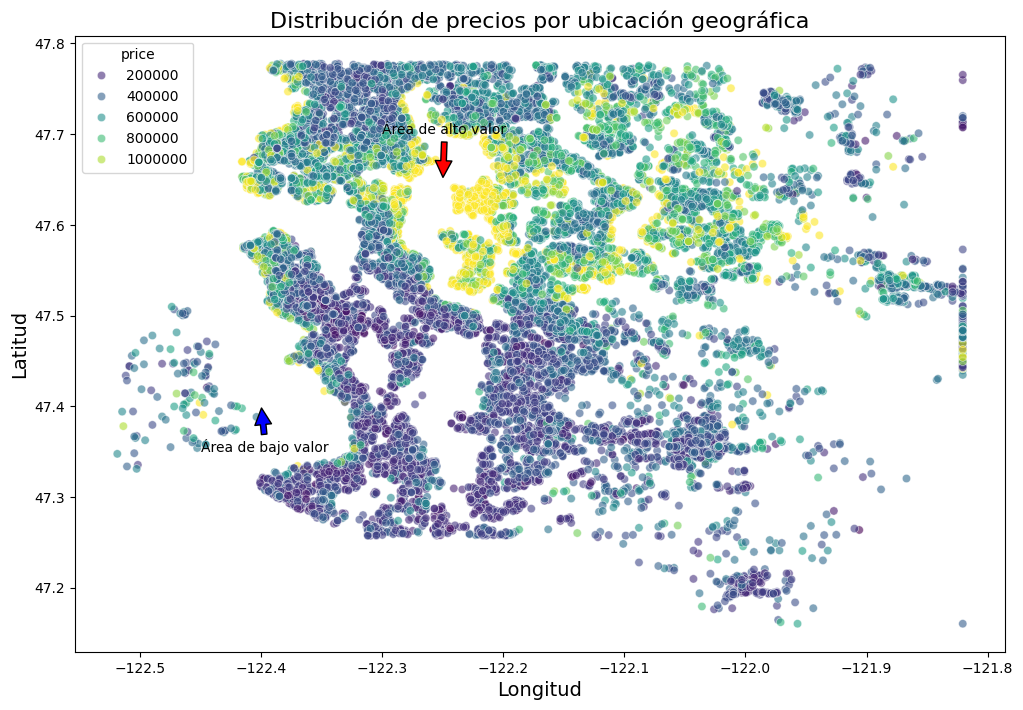

In [15]:
# Gráfico de dispersión con anotaciones
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', hue='price', data=df_final, palette='viridis', alpha=0.6)
plt.title('Distribución de precios por ubicación geográfica', fontsize=16)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitud', fontsize=14)

# Resaltar áreas clave
plt.annotate('Área de alto valor', xy=(-122.25, 47.65), xytext=(-122.3, 47.7),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate('Área de bajo valor', xy=(-122.4, 47.4), xytext=(-122.45, 47.35),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

### **¿Cómo influyen las características de las viviendas vecinas en el precio?**
Hipótesis: El tamaño de las viviendas vecinas (sqft_living15) tiene un impacto significativo en el precio.

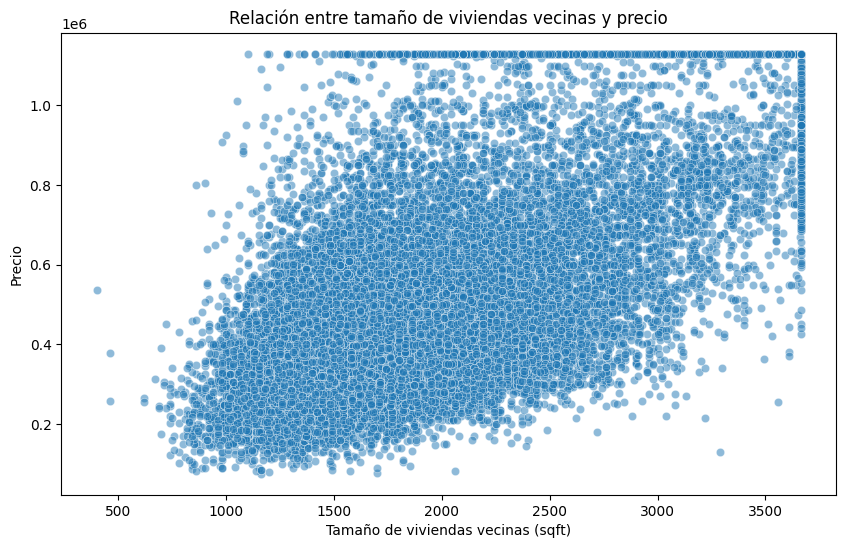

In [ ]:
# Calcular la correlación entre sqft_living15 y price.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living15', y='price', data=df_final, alpha=0.5)
plt.title('Relación entre tamaño de viviendas vecinas y precio')
plt.xlabel('Tamaño de viviendas vecinas (sqft)')
plt.ylabel('Precio')
plt.show()

### **Insights clave**
1. **Influencia positiva del tamaño de las viviendas vecinas**: Las viviendas ubicadas en áreas con propiedades más grandes tienden a tener precios más altos. Esto sugiere que el entorno de la vivienda es un factor importante en su valoración.

2. **Variabilidad en los precios**: Aunque existe una tendencia positiva, la dispersión de los datos indica que otros factores (como el tamaño de la vivienda, la calidad de la construcción, o la ubicación) también influyen en el precio.

3. **Concentración en rangos específicos**: La mayoría de las viviendas tienen un tamaño vecinal entre 1.000 y 3.000 sqft y un precio entre
200.000 y 200.000 y 800.000, lo que podría representar el mercado inmobiliario típico en esta área.

#### **Visualización mejorada**
Para comunicar estos insights de manera más efectiva, se puede mejorar la visualización añadiendo una línea de tendencia y anotaciones:

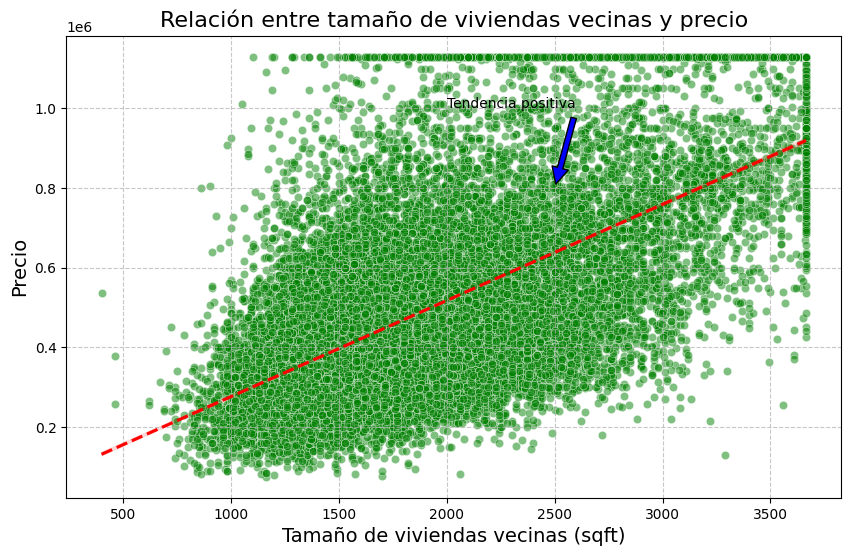

In [16]:
# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living15', y='price', data=df_final, alpha=0.5, color='green')
sns.regplot(x='sqft_living15', y='price', data=df_final, scatter=False, color='red', line_kws={'linestyle': '--'})
plt.title('Relación entre tamaño de viviendas vecinas y precio', fontsize=16)
plt.xlabel('Tamaño de viviendas vecinas (sqft)', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Anotación para resaltar la tendencia
plt.annotate('Tendencia positiva', xy=(2500, 800000), xytext=(2000, 1000000),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

### **¿Cómo afecta el número de habitaciones y baños al precio?**
Hipótesis: A mayor número de habitaciones y baños, mayor es el precio.

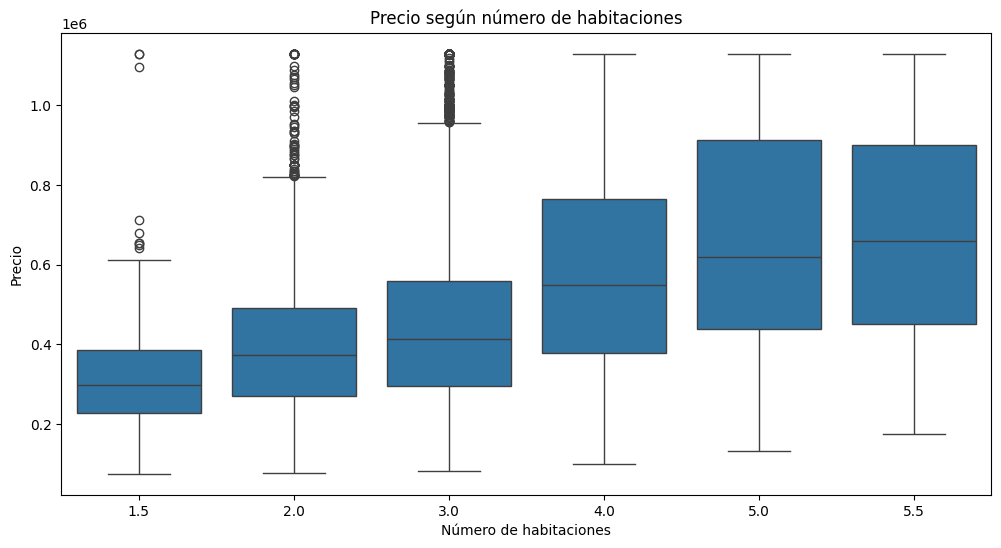

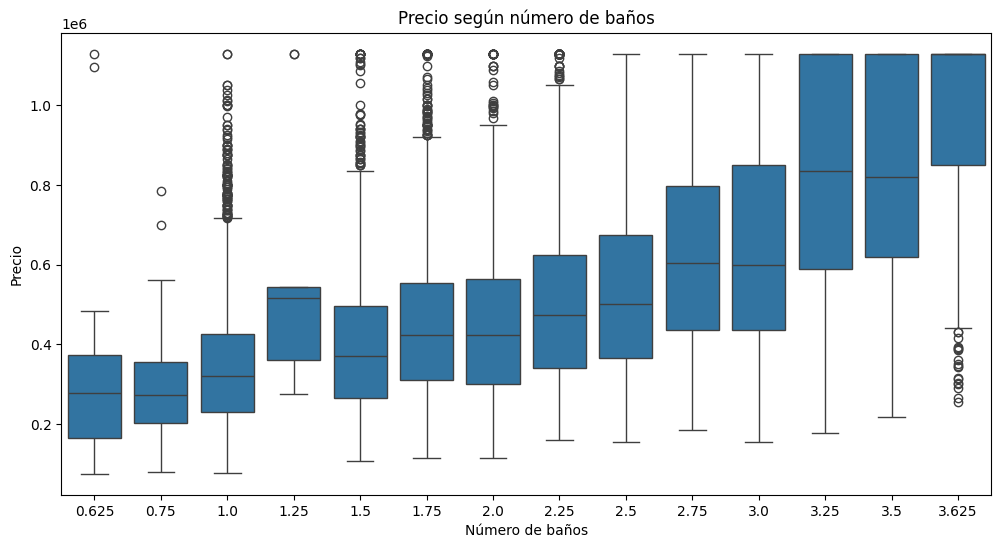

In [ ]:
# Crear gráficos de caja para comparar el precio según el número de habitaciones y baños.
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=df_final)
plt.title('Precio según número de habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='bathrooms', y='price', data=df_final)
plt.title('Precio según número de baños')
plt.xlabel('Número de baños')
plt.ylabel('Precio')
plt.show()

### **Insights clave**
1. **Influencia positiva del número de habitaciones y baños**: Las viviendas con más habitaciones y baños tienden a ser más caras, lo que sugiere que el tamaño de la vivienda (en términos de habitaciones y baños) es un factor importante en su valoración.

2. **Variabilidad en los precios**: Aunque existe una tendencia general, la variabilidad en los precios indica que otros factores (como la ubicación, la calidad de la construcción, o el tamaño del terreno) también influyen en el precio.

3. **Outliers**: La presencia de outliers sugiere que hay viviendas que no siguen la tendencia general, lo que podría deberse a características especiales (por ejemplo, ubicaciones premium o características únicas).

#### **Visualización mejorada**
Para comunicar estos insights de manera más efectiva, se puede mejorar la visualización añadiendo anotaciones y resaltando áreas clave:

<ipython-input-17-3d8f34b0151c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df_final, palette='viridis')


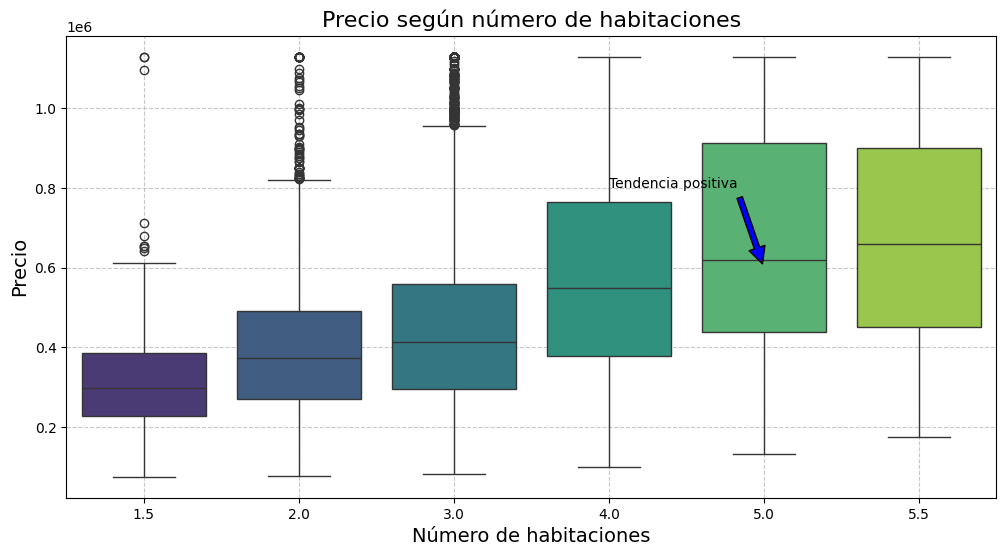

In [17]:
# Gráfico de caja mejorado
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=df_final, palette='viridis')
plt.title('Precio según número de habitaciones', fontsize=16)
plt.xlabel('Número de habitaciones', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Anotación para resaltar la tendencia
plt.annotate('Tendencia positiva', xy=(4, 600000), xytext=(3, 800000),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

### **¿Las viviendas con vista al agua tienen un precio significativamente más alto?**
Hipótesis: Las viviendas con vista al agua (waterfront = 1) tienen un precio mucho más alto que las que no la tienen.

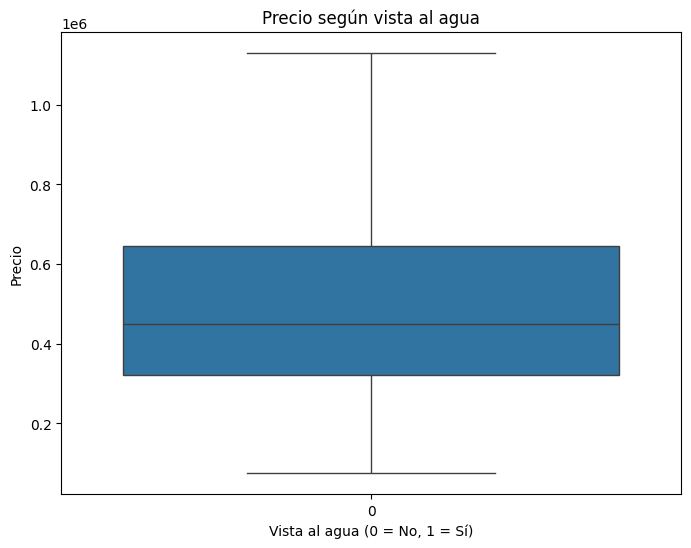

In [ ]:
# Comparar el precio promedio de viviendas con y sin vista al agua.
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df_final)
plt.title('Precio según vista al agua')
plt.xlabel('Vista al agua (0 = No, 1 = Sí)')
plt.ylabel('Precio')
plt.show()

### **Insights clave**
1. **Influencia significativa de la vista al agua**: Las viviendas con vista al agua tienen precios significativamente más altos que las que no la tienen. Esto sugiere que la vista al agua es un factor de lujo que incrementa considerablemente el valor de una propiedad.

2. **Variabilidad en los precios**: Aunque la mayoría de las viviendas con vista al agua son más caras, hay una variabilidad significativa, lo que indica que otros factores (como el tamaño de la vivienda, la calidad de la construcción, o la ubicación exacta) también influyen en el precio.

3. **Outliers**: La presencia de outliers en ambos grupos sugiere que hay viviendas que no siguen la tendencia general, lo que podría deberse a características especiales (por ejemplo, ubicaciones premium o características únicas).

### **¿Cómo influye el año de construcción en el precio?**
Hipótesis: Las viviendas más nuevas tienden a ser más caras.

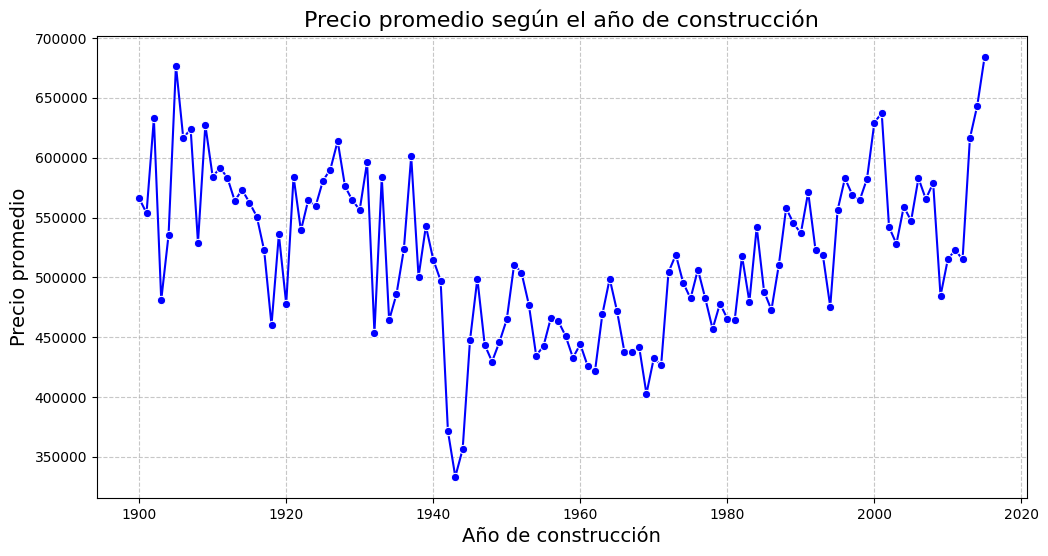

In [ ]:
# Agrupar los datos por año de construcción (yr_built) y calcularemos el precio promedio para cada año.

# Calcular el precio promedio por año de construcción
price_by_year = df_final.groupby('yr_built')['price'].mean().reset_index()

# Visualización
plt.figure(figsize=(12, 6))
sns.lineplot(x='yr_built', y='price', data=price_by_year, marker='o', color='b')
plt.title('Precio promedio según el año de construcción', fontsize=16)
plt.xlabel('Año de construcción', fontsize=14)
plt.ylabel('Precio promedio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### **Insights clave**
1. **Influencia positiva del año de construcción**: Las viviendas más nuevas tienden a tener precios más altos, lo que sugiere que la antigüedad de la propiedad es un factor importante en su valoración.

2. **Crecimiento moderado**: El aumento en el precio promedio no es abrupto, sino gradual, lo que indica un mercado estable sin fluctuaciones extremas.

3. **Variabilidad en años recientes**: Aunque las viviendas más nuevas son generalmente más caras, hay cierta variabilidad en los precios, lo que podría deberse a factores como la ubicación, el tamaño, o la calidad de la construcción.

#### **Visualización mejorada**
Para comunicar estos insights de manera más efectiva, se puede mejorar la visualización añadiendo una línea de tendencia y anotaciones:

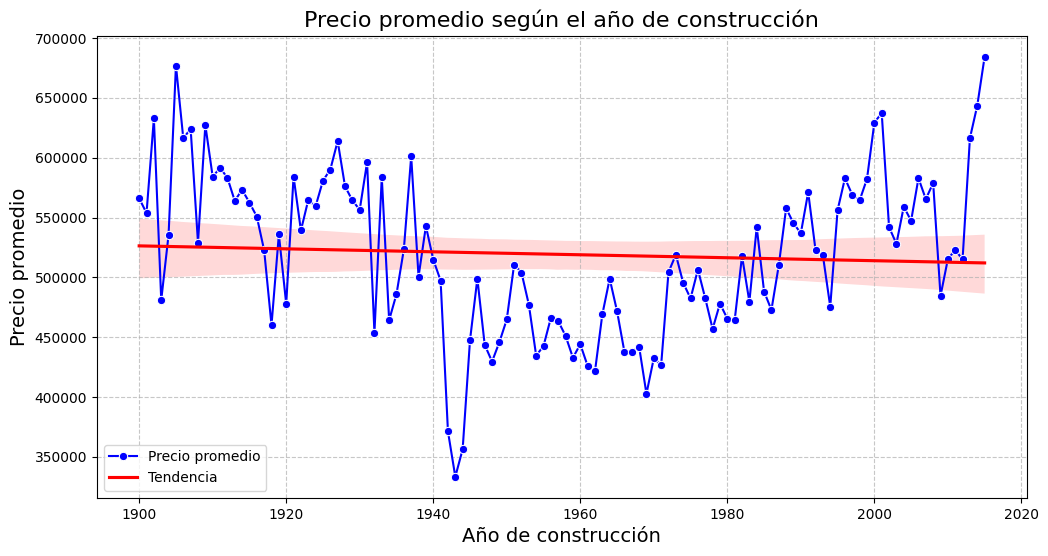

In [19]:
# Calcular el precio promedio por año de construcción
price_by_year = df_final.groupby('yr_built')['price'].mean().reset_index()

# Gráfico de línea con línea de tendencia
plt.figure(figsize=(12, 6))
sns.lineplot(x='yr_built', y='price', data=price_by_year, marker='o', color='b', label='Precio promedio')
sns.regplot(x='yr_built', y='price', data=price_by_year, scatter=False, color='r', label='Tendencia')
plt.title('Precio promedio según el año de construcción', fontsize=16)
plt.xlabel('Año de construcción', fontsize=14)
plt.ylabel('Precio promedio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### **¿Existe una relación entre el tamaño del terreno y el precio?**
Hipótesis: El tamaño del terreno (sqft_lot) tiene una correlación positiva con el precio, pero menos fuerte que el tamaño de la vivienda.

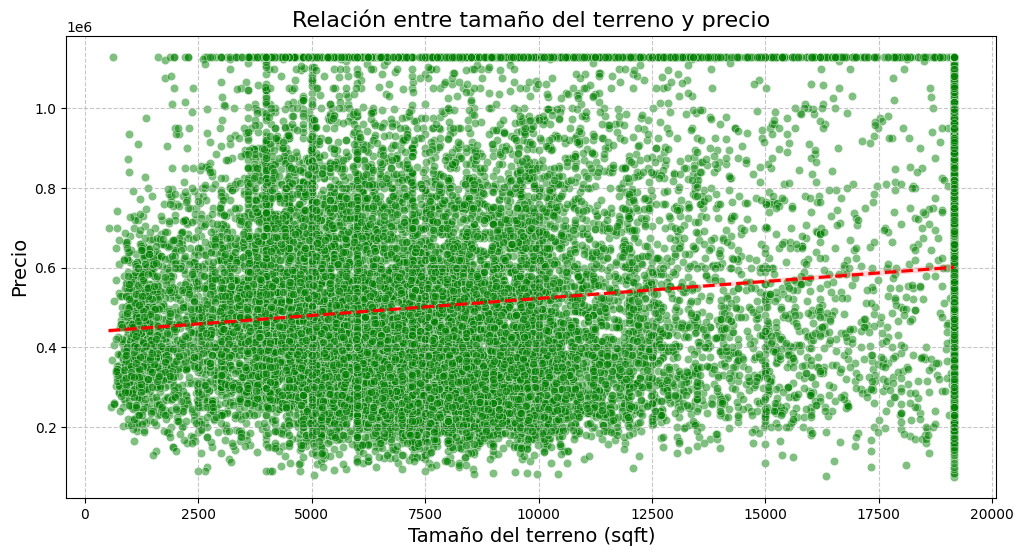

In [ ]:
# Usar un gráfico de dispersión para visualizar la relación entre el tamaño del terreno (sqft_lot) y el precio (price).

# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sqft_lot', y='price', data=df_final, alpha=0.5, color='green')
sns.regplot(x='sqft_lot', y='price', data=df_final, scatter=False, color='red', line_kws={'linestyle': '--'})
plt.title('Relación entre tamaño del terreno y precio', fontsize=16)
plt.xlabel('Tamaño del terreno (sqft)', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### **Insights clave**
1. **Influencia limitada del tamaño del terreno**: El tamaño del terreno tiene una influencia limitada en el precio de las viviendas. Esto sugiere que otros factores, como el tamaño de la vivienda (sqft_living) o la calidad de la construcción (grade), son más importantes en la valoración.

2. **Concentración en rangos específicos**: La mayoría de las viviendas tienen terrenos entre 0 y 20.000 sqft y precios entre 0 y 1.000.000, lo que podría representar el mercado inmobiliario típico en esta área.

3. **Outliers**: La presencia de outliers sugiere que hay terrenos muy grandes que no siguen la tendencia general, lo que podría deberse a características especiales (por ejemplo, ubicaciones premium o características únicas).

#### **Visualización mejorada**
Para comunicar estos insights de manera más efectiva, se puede mejorar la visualización añadiendo una línea de tendencia y anotaciones:

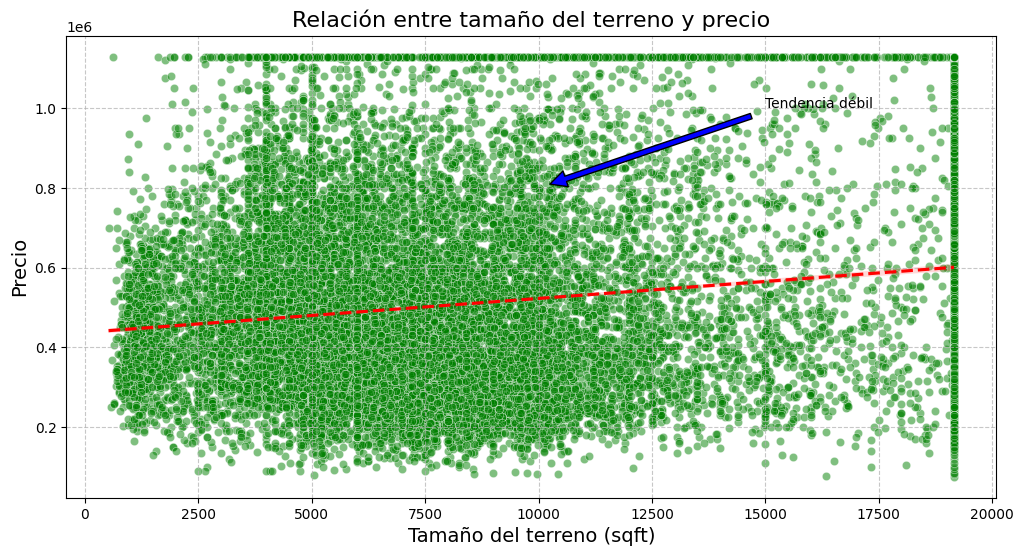

In [20]:
# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sqft_lot', y='price', data=df_final, alpha=0.5, color='green')
sns.regplot(x='sqft_lot', y='price', data=df_final, scatter=False, color='red', line_kws={'linestyle': '--'})
plt.title('Relación entre tamaño del terreno y precio', fontsize=16)
plt.xlabel('Tamaño del terreno (sqft)', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Anotación para resaltar la tendencia
plt.annotate('Tendencia débil', xy=(10000, 800000), xytext=(15000, 1000000),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()